In [1]:
import pandas as pd
from sklearn import linear_model
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from eyeInfo import EyeInfo
import numpy as np

In [2]:
prefix = 'mask2'
output = './csv/output/outleft.csv'
train_imput = f'./csv/data/{prefix}_fixed_train_data.csv'
predict_input = f'./csv/data/{prefix}_predict_train_data.csv'

fieldnames = ['screen_x', 'screen_y', 'left_iris_x','left_iris_y']

calib_points = [
    { "x": 200, "y": 200, 'order':1 },
    { "x": 1672, "y": 200, 'order':2 },
    { "x": 936, "y": 472, 'order':3 },
    { "x": 200, "y": 744, 'order':4 },
    { "x": 1672, "y": 744, 'order':5 }
]


In [3]:
def train_to_validate_calib():
    dataset_train_path = train_imput
    dataset_predict_path = predict_input

    data = pd.read_csv(dataset_train_path)

    X = data[[ 'left_iris_x', 'left_iris_y']]
    y = data[['point_x', 'point_y']]

    model = linear_model.LinearRegression()
    model.fit(X, y)

    dados_teste = pd.read_csv(dataset_predict_path)
    dados_teste.drop(['right_iris_x', 'right_iris_y'], axis=1, inplace=True)
    eye_positions = dados_teste[['left_iris_x', 'left_iris_y']].values
    previsoes = model.predict(dados_teste)

    combined_predictions = np.concatenate((previsoes, eye_positions), axis=1)
    return combined_predictions.tolist()

In [4]:
teste = train_to_validate_calib()
print(teste)

with open(output, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for row in teste:
        writer.writerow({'screen_x': row[0], 'screen_y': row[1],'left_iris_x': row[2],'left_iris_y': row[3]})

[[945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9885559082031], [945.0952924699959, 528.8321275020262, 698.3877563476562, 325.9

In [5]:
eye = EyeInfo(calib_points=calib_points, dataset=output, is_left=True)
eye.init_eye()
prediction_df = eye.prediction_df
calib_df = eye.calib_df

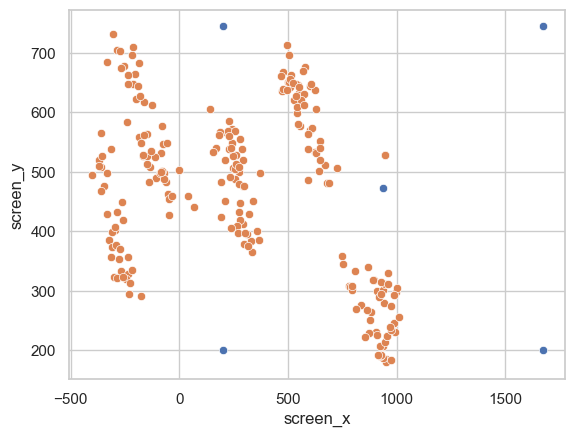

In [6]:
low_lim = 0
upper_lim_x = eye.k_screen_width    
upper_lim_y = eye.k_screen_height

sns.set(style="whitegrid")
sns.scatterplot(data=calib_df, x='screen_x', y='screen_y')
sns.scatterplot(data=prediction_df, x='screen_x', y='screen_y')

# plt.xlim(low_lim, upper_lim_x)
# plt.ylim(low_lim, upper_lim_y)

plt.show()